## Loading the dataset

In [7]:
import pandas as pd
df_train = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/california_housing_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/california_housing_test.csv')


y_train = df_train['median_house_value']
y_test = df_test['median_house_value']
x_train = df_train.drop('median_house_value',axis=1)
x_test = df_test.drop('median_house_value',axis=1)
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


## Training the model

### Linear regression


#### training using linear regression

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Making Prediction

In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

y_lr_test_pred

array([352812.31112454, 212717.70074518, 272344.69951888, ...,
        88220.58643733, 146374.67481457, 456779.61107787])

#### Evaluting the model

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)

lr_train_r2 = r2_score(y_train,y_lr_train_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

lr_result = pd.DataFrame(['Linear Regression',lr_train_mse,lr_test_mse,lr_train_r2,lr_test_r2]).transpose()
lr_result.columns =['Model','Train_MSE', 'Test MSE','Train R2','Test R2']
lr_result

,Model,Train_MSE,Test MSE,Train R2,Test R2
0,Linear Regression,4824523173.926901,4867205486.928806,0.641338,0.619506


### Random Forest

#### training using random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=5,random_state=69)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=5, random_state=69)

#### Making prediction

In [42]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_test_pred

array([335506.12469721, 218702.21525502, 285675.26196764, ...,
        72435.8109312 , 187145.64044073, 465730.14095319])

#### Evaluting the model

In [43]:
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)

rf_train_r2 = r2_score(y_train,y_rf_train_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

rf_result = pd.DataFrame(['Random Forest',rf_train_mse,rf_test_mse,rf_train_r2,rf_test_r2]).transpose()
rf_result.columns =['Model','Train_MSE', 'Test MSE','Train R2','Test R2']
rf_result


,Model,Train_MSE,Test MSE,Train R2,Test R2
0,Random Forest,4860956937.820683,5077234717.966222,0.638629,0.603087


## Model Comparison

In [44]:
df_models = pd.concat([lr_result,rf_result],axis=0).reset_index(drop=True)
df_models

,Model,Train_MSE,Test MSE,Train R2,Test R2
0,Linear Regression,4824523173.926901,4867205486.928806,0.641338,0.619506
1,Random Forest,4860956937.820683,5077234717.966222,0.638629,0.603087


## visualization

Text(0.5, 0, 'Exprerimental logS')

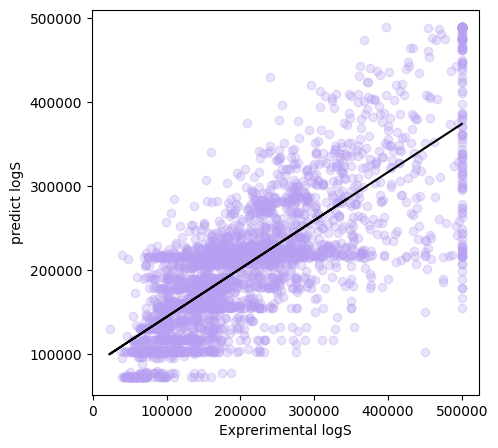

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_test,y=y_rf_test_pred,c='#B79FF1',alpha=0.3)
r = np.polyfit(y_test,y_rf_test_pred,1)
p = np.poly1d(r)
plt.plot(y_test,p(y_test),'#000')
plt.ylabel('predict logS')
plt.xlabel('Exprerimental logS')